In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

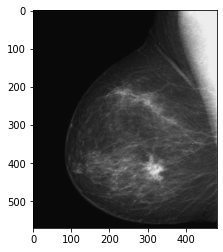

In [2]:
# Passando a imagem para uma variável
imagem_original=cv2.imread('mamografia.tif')
imagem_original=cv2.cvtColor(imagem_original, cv2.COLOR_BGR2GRAY)

# Utilizando matplotlib para "plotar" a imagem
plt.imshow(imagem_original, cmap='gray')

# Convertendo a imagem para um numpy.array
imagem_array=np.array(imagem_original)

In [2]:
imagem_original=[[10, 200, 10, 10],
                 [10, 200, 10, 10],
                 [10, 200, 10, 255],
                 [10, 200, 10, 10]]
imagem_original=np.asarray(imagem_original)

In [3]:
def convolucao_2d(imagem_entrada, filtro, mediana=False):
    """
    Função que fará a convulução de uma dada imagem de acordo com
    o respectivo filtro (kernel).
    
    Parâmetros
    -----------
    imagem: numpy.array 
        Imagem que sofrerá a convolução
    
    filtro: numpy.array
        Matrix responsável pela alteração na imagem
    
    Return
    -----------
    output_convolucao: numpy.array
        Imagem após o processo de convolução com seu respectivo
        filtro
    
    """
    # Aplicando correlação cruzada no filtro = *rotacionar em 180 para convolução*
    filtro=np.flipud(np.fliplr(filtro))
    # Declarando a saída da função
    output_convolucao=np.zeros(imagem_entrada.shape)
    
    # Aplicando zero padding na imagem_entrada para manter suas dimensões em output_convolucao
    imagem_zpadding=np.zeros((imagem_entrada.shape[0]+2, imagem_entrada.shape[1]+2))
    imagem_zpadding[1:-1, 1:-1]=imagem_entrada
    
    # Fazendo a verificação se sera usada a convolução mediana
    if mediana:
        for col in range((imagem_entrada.shape[1])):
            for linha in range((imagem_entrada.shape[0])):
                output_convolucao[linha, col]=np.median(imagem_zpadding[linha:linha+filtro.shape[0], col:col+filtro.shape[1]])
    else:
        # Realizando a operação de Produto Hadamard (element-wise multiplication)
        for col in range((imagem_entrada.shape[1])):
            for linha in range((imagem_entrada.shape[0])):
                output_convolucao[linha, col]=np.multiply(filtro,
                                                          imagem_zpadding[linha:linha+filtro.shape[0], col:col+filtro.shape[1]]).sum()
    return output_convolucao

In [10]:
filtro_laplaciano_segunda=np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]]) #Por motivos de melhor visualização da convolução

imagem_conv_laplaciano = convolucao_2d(imagem_original, filtro_laplaciano_segunda)

In [11]:
filtro_laplaciano_segunda_posi=np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])*-1
filtro_laplaciano_segunda_posi
imagem_conv_laplaciano_posi = convolucao_2d(imagem_original, filtro_laplaciano_segunda_posi)

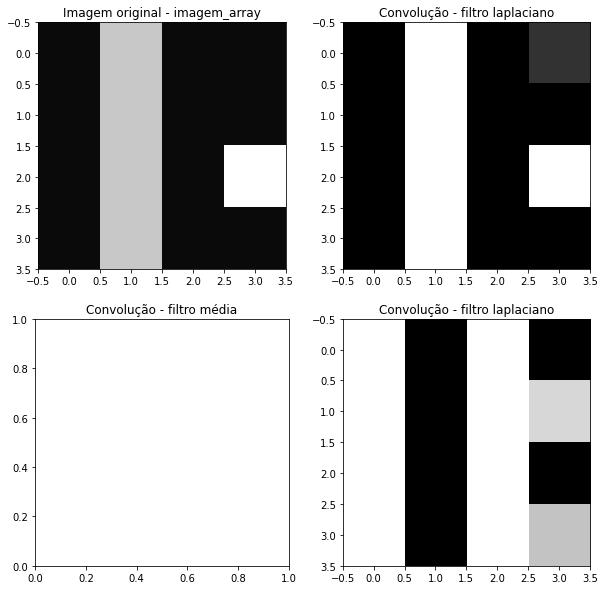

In [12]:
#Plottando a comparação entre as imagens com diferentes filtros
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0,0].imshow(imagem_original, cmap='gray', vmin=0, vmax=255)
ax[0,1].imshow(imagem_conv_laplaciano, cmap='gray', vmin=0, vmax=255)

#ax[1,0].imshow(imagem_conv_media, cmap='gray', vmin=0, vmax=255)
ax[1,1].imshow(imagem_conv_laplaciano_posi, cmap='gray', vmin=0, vmax=255)

#OBS: Manter os parâmetros vmin e vmax para não ocorrer uma má interpretação da convolução

titulos=['Imagem original - imagem_array',
         'Convolução - filtro laplaciano',
         'Convolução - filtro média',
         'Convolução - filtro laplaciano']

for obj, title in zip(ax.ravel(), titulos):
    obj.set_title(title, loc='center')

In [13]:
imagem_conv_laplaciano

array([[-330., 1360., -350.,   50.],
       [-540., 1140., -815., -215.],
       [-540., 1140., -815., 1990.],
       [-330., 1360., -595., -195.]])